In [2]:
from scripts2 import project_functions
df = project_functions.load_and_process('../../data/raw/nomenclature.csv')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df.head()

,index,Planet Name,ID,FeatureName,FeatureType,Planetary Feature,Latitude of Center of Planetary Feature,Longitude of Center of Planetary Feature,Size of Planetary Feature(km)
0,1357,Mars,4574.0,Pandorae Fretum,albedo feature,AL,-24.741878,44.0,0.0
1,1459,Mars,6596.0,Xanthe,albedo feature,AL,9.884955,310.0,0.0
2,1168,Mars,2132.0,Gehon,albedo feature,AL,14.831743,360.0,0.0
3,1462,Mars,6639.0,Yaonis Regio,albedo feature,AL,-39.667248,40.0,0.0
4,1165,Mars,4213.0,Nereidum Fretum,albedo feature,AL,-44.661768,305.0,0.0


Research Question: Is there a correlation between crater impact location, and crater size. 

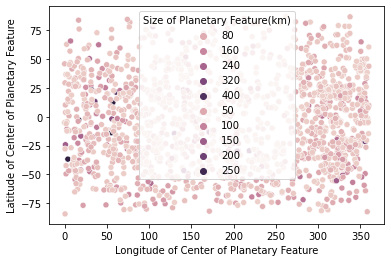

In [3]:
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 

sns.scatterplot(data = marscraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')
venusdata = df[df['Planet Name'] == "Venus"]


venuscraterdata = venusdata[venusdata['FeatureType'] == ' crater '] 

sns.scatterplot(data = venuscraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')


names = df['Planet Name']



#venusdata
#plt.xlabel("Longitude", size=20)
#plt.ylabel("Latitude", size=20)


In [4]:
a = df['Planet Name'].unique()
a

array(['Mars', 'Moon', 'Titan', 'Mercury', 'Dione', 'Rhea', 'Ganymede',
       'Ceres', 'Callisto', 'Triton', 'Mimas', 'Vesta', 'Europa', 'Pluto',
       'Venus', 'Ariel', 'Tethys', 'Oberon', 'Charon', 'Titania',
       'Miranda', 'Steins', 'Enceladus', 'Phobos', 'Eros', 'Epimetheus',
       'Iapetus', 'Amalthea', 'Thebe', 'Gaspra', 'Puck', 'Lutetia',
       'Deimos', 'Phoebe', 'Janus', 'Proteus', 'Hyperion', 'Ida',
       'Mathilde', 'Umbriel', 'Dactyl', 'Itokawa', 'Ryugu', 'Io', 'Bennu'],
      dtype=object)

<AxesSubplot:xlabel='Longitude of Center of Planetary Feature', ylabel='Latitude of Center of Planetary Feature'>

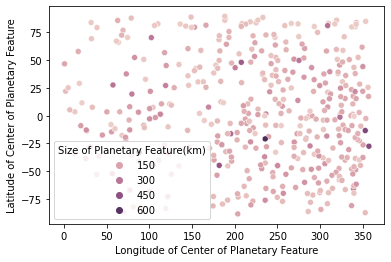

In [5]:
mercurydata = df[df['Planet Name'] == "Mercury"]
mercurycraterdata = mercurydata[mercurydata['FeatureType'] == ' crater '] 

sns.scatterplot(data = mercurycraterdata, y='Latitude of Center of Planetary Feature',x='Longitude of Center of Planetary Feature',hue='Size of Planetary Feature(km)')
 

In [6]:
a = df['Planet Name'].unique()
for i in a:
  
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '].size
    if test2 > 1000:
        print(test2)
        print(i)

10143
Mars
14202
Moon
3744
Mercury
1152
Rhea
1161
Ganymede
1035
Ceres
1269
Callisto
7929
Venus


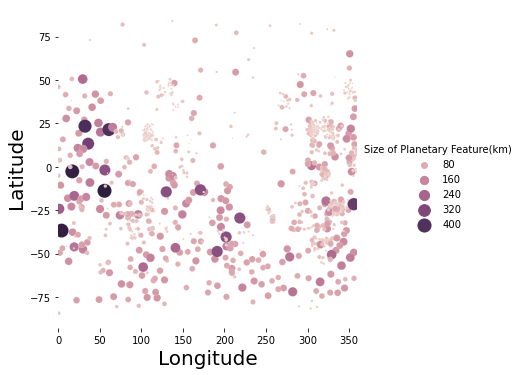

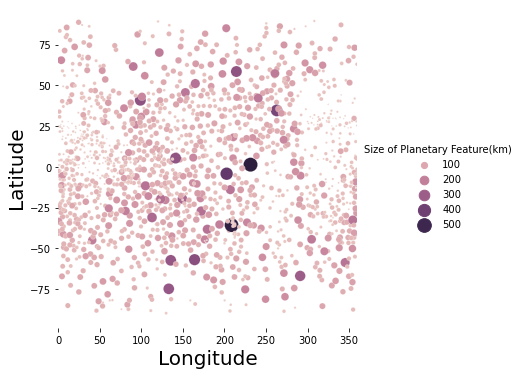

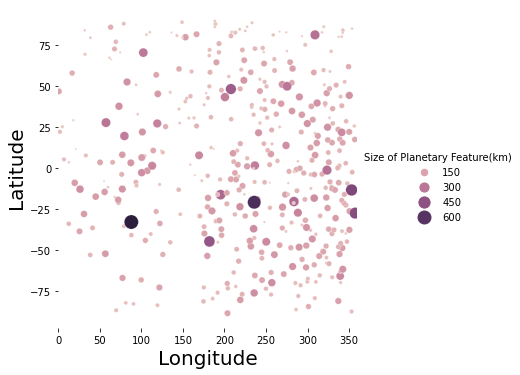

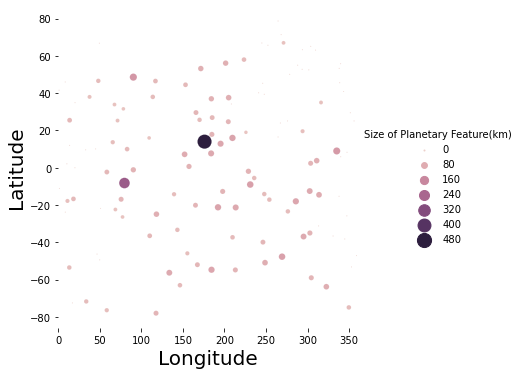

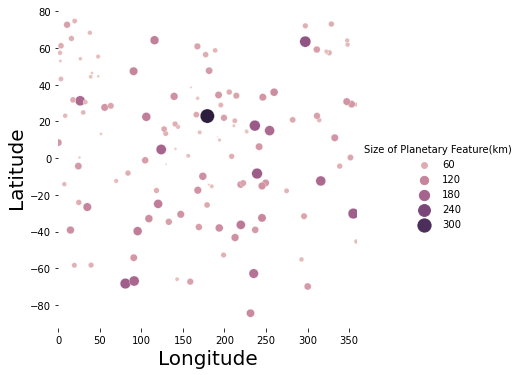

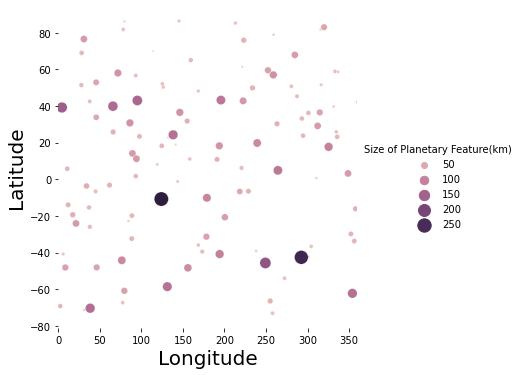

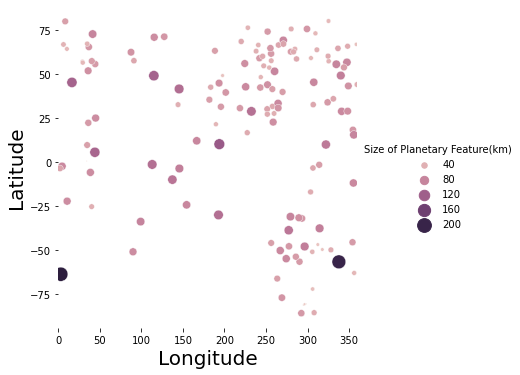

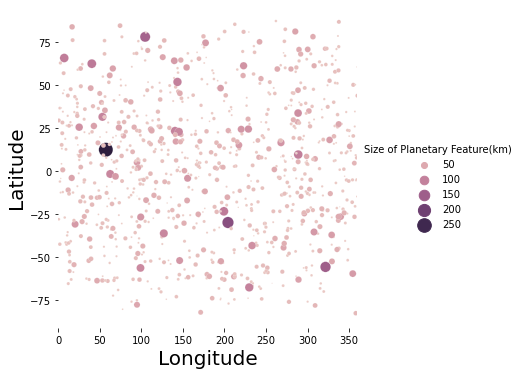

In [7]:
a = df['Planet Name'].unique()
for i in a:
    test = df[df['Planet Name'] ==i]
    test2 = test[test['FeatureType'] == ' crater '] 
  
    test3 = test[test['FeatureType'] == ' crater '].size 
    
    if test3 > 1000:  
        c = sns.color_palette("flare", as_cmap=True)
    
        moon_feat_size_map = sns.relplot(
        data=test2,
        y="Latitude of Center of Planetary Feature", x="Longitude of Center of Planetary Feature",
        size="Size of Planetary Feature(km)",hue = "Size of Planetary Feature(km)",
        sizes=(1, 200))
        moon_feat_size_map.set(xlim=(0, 360))
        moon_feat_size_map.ax.xaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.ax.yaxis.grid(True, "minor", linewidth=.25)
        moon_feat_size_map.set_xlabels("Longitude", size=20)
        moon_feat_size_map.set_ylabels("Latitude", size=20)
        moon_feat_size_map.despine(left=True, bottom=True)
  
  

 As shown by the visuals above, there doesnt seem to be a correlation

     As shown analytically by the linear regression model, there is insufficient data to reject the null hypothesis, meaning there is no correlation between the location of a crater, and the craters size. 
     There also appears to be no location that is hit more than others. 

In [8]:
marsdata = df[df['Planet Name'] == "Mars"]
marscraterdata = marsdata[marsdata['FeatureType'] == ' crater '] 
model = LinearRegression(normalize = True)
x=marscraterdata["Latitude of Center of Planetary Feature"].iloc[:300].to_numpy().reshape(1, -1)
y=marscraterdata["Size of Planetary Feature(km)"].iloc[:300].to_numpy().reshape(1, -1)
x1=venuscraterdata["Latitude of Center of Planetary Feature"].iloc[:300].to_numpy().reshape(1, -1)
y1=venuscraterdata["Size of Planetary Feature(km)"].iloc[:300].to_numpy().reshape(1, -1)
model.fit(x,y)
print('slope:', model.coef_)
y_pred = model.intercept_ + model.coef_ * x1
print('predicted response:', y_pred, sep='\n')
r_sq = model.score(x1, y)
print('coefficient of determination:', r_sq)

slope: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
predicted response:
[[106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 ...
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]
 [106.948     6.32815  10.7481  ...  76.9732   50.4211  168.867  ]]
coefficient of determination: nan


/Users/edouard/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
x2=marscraterdata["Latitude of Center of Planetary Feature"].to_numpy().reshape(1, -1)
y2=marscraterdata["Longitude of Center of Planetary Feature"].to_numpy().reshape(1, -1)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x2, y2)
print(neigh.predict_proba([[0.9]]))

ValueError: Unknown label type: 'continuous-multioutput'